CHURN RATE PREDICTION

First of all, to perform the prediction, I have to import necessary libraries for data cleaning and manipulation.

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Before performing the analysis, I have to load the data by using the pandas library.

In [48]:
# Load the data
train_data = pd.read_csv('ChurnRate\churn-bigml-80.csv')
test_data = pd.read_csv('ChurnRate\churn-bigml-20.csv')

After loading the data, I will display the first 10 rows of the dataset by using .head() function. Because of having 2 datasets, I will focus mainly on the training data.

In [49]:
# Display the first 10 rows of the train data
train_data.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


To gain more knowledge about this dataset, I will perform the Exploratory Data Analysis (EDA).

Firstly, I use the .info() function to check for data types, columns, rows and null values. 

In [50]:
# Check data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

As we can see, there are 2666 entries corresponding to 2666 rows and 20 columns. There is no missing values in this dataset and there are 4 main types of data bool, float, int and object. Next I will check the distribution of the dataset using .describe() function.

In [51]:
# Check the statistics of the data
train_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


I will separate the train dataset into numerical and categorical features. 

In [52]:
# Extract categorical variables
cat_var = train_data.select_dtypes(include=['object']).columns
cat_var

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [53]:
# Extract numerical variables
num_var = train_data.select_dtypes(include=['int64', 'float64']).columns
num_var

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [54]:
# Extract the target variable
target = train_data['Churn']
train_data = train_data.drop('Churn', axis=1)
target

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 2666, dtype: bool

After extracting the variables, I will check the distribution of the numerical features by using the hist plot. I group the data by 'Churn' feature to compare the values for each variable features.

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

<Figure size 1000x800 with 0 Axes>

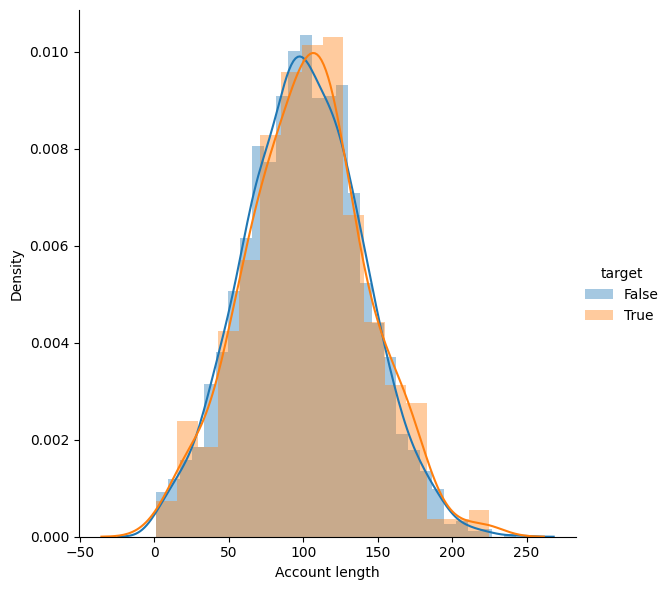

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

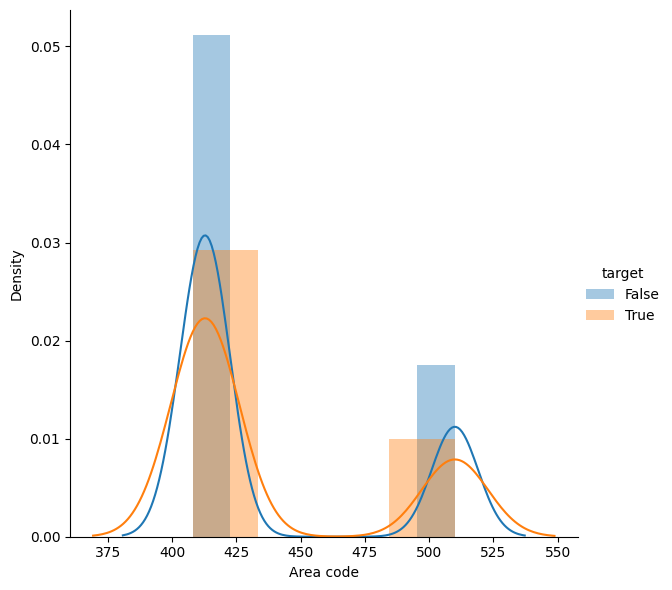

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

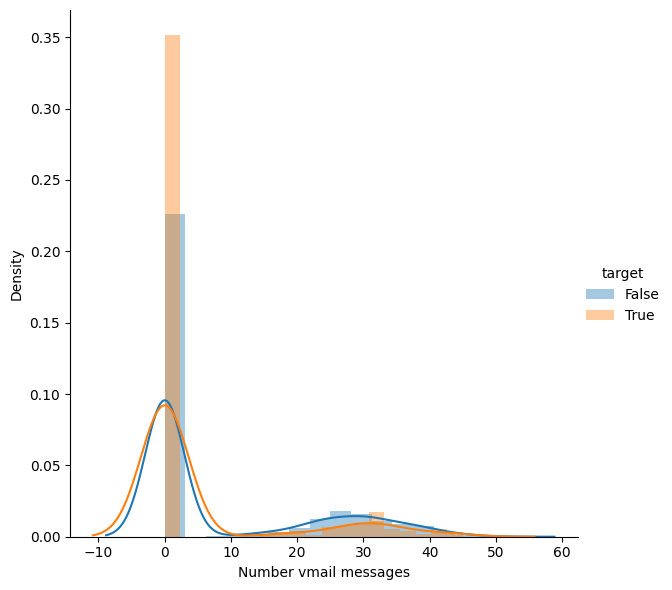

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

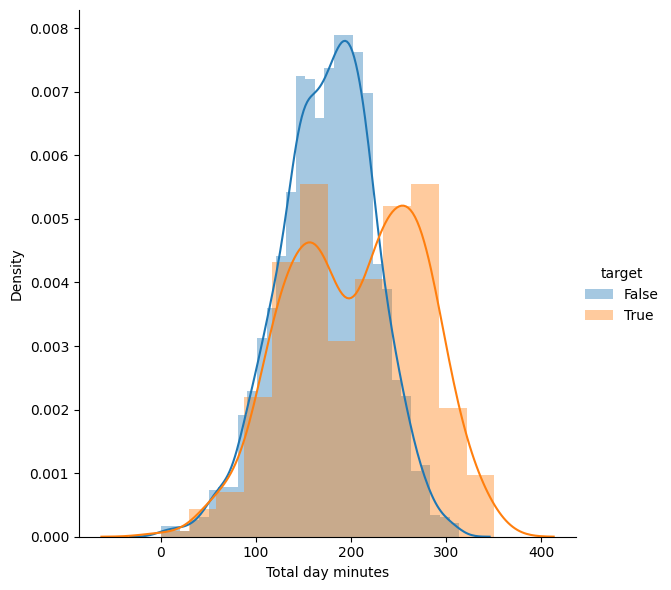

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

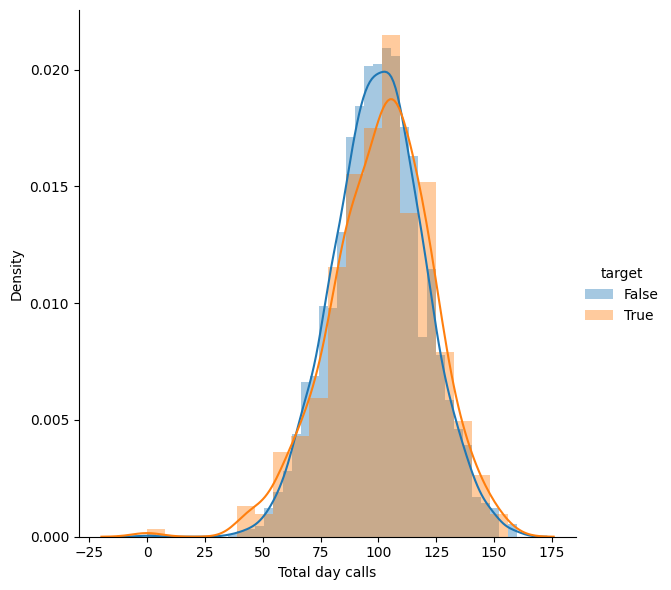

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

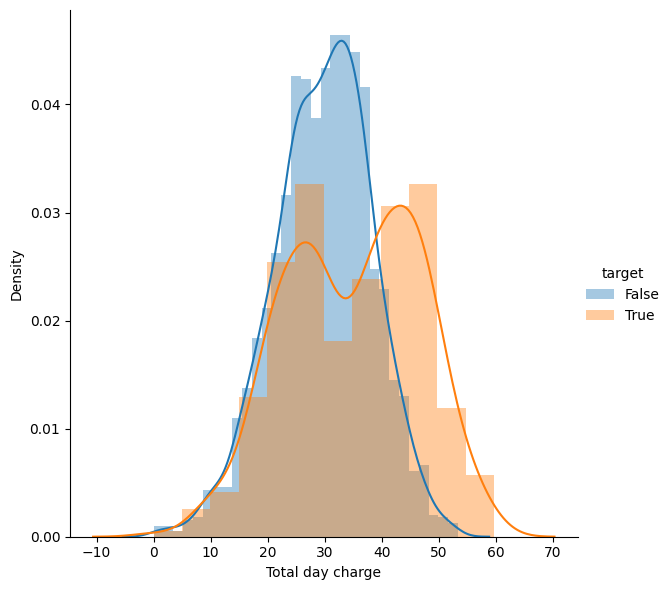

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

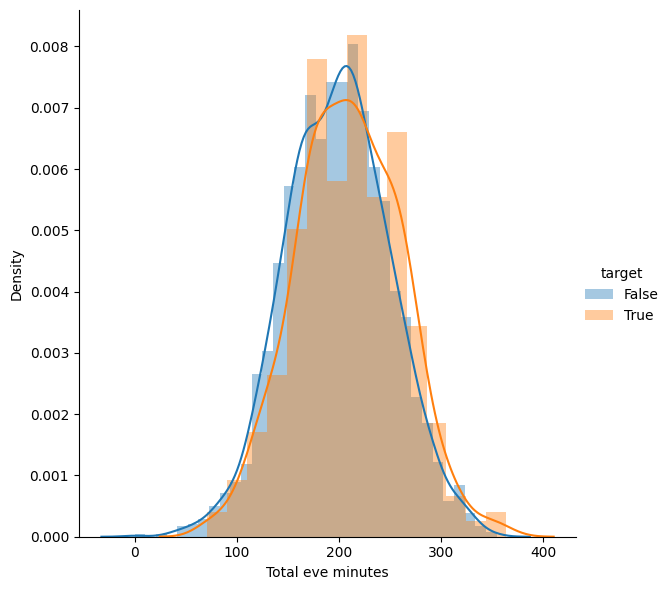

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

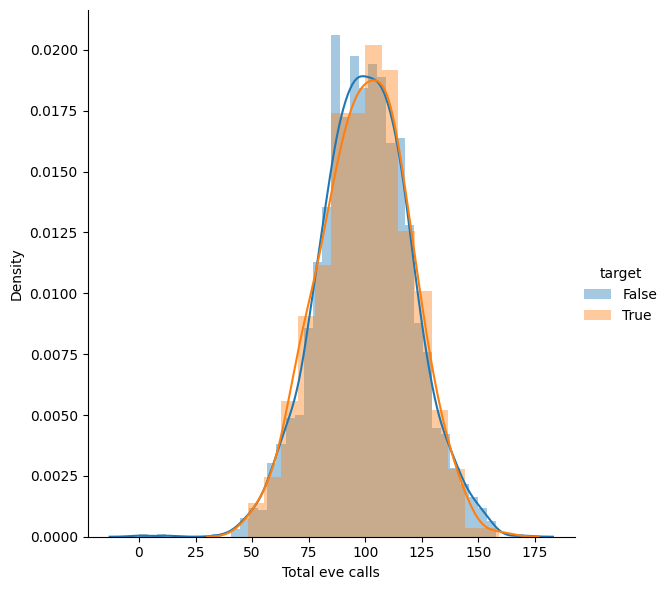

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

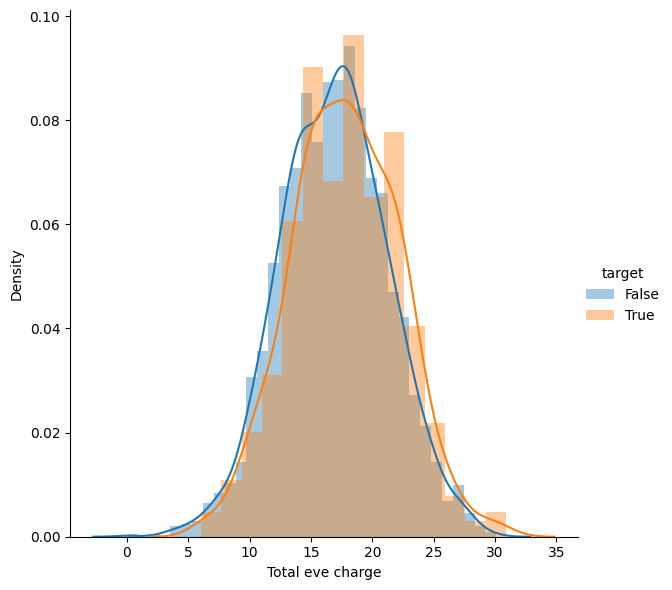

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

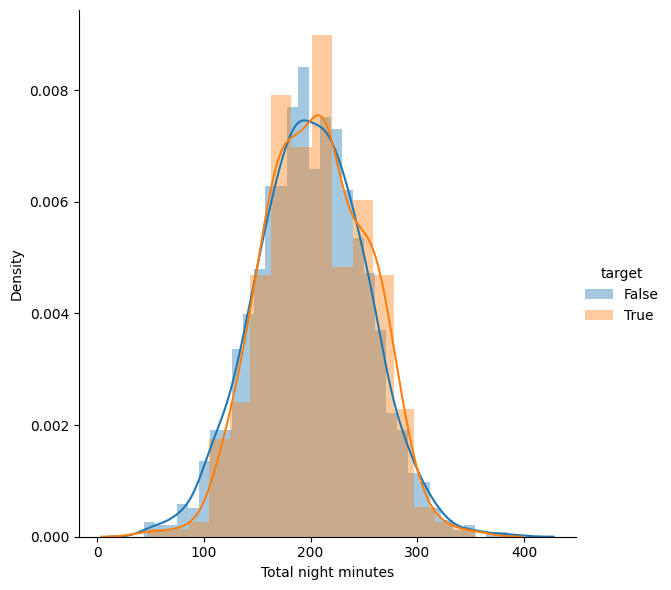

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

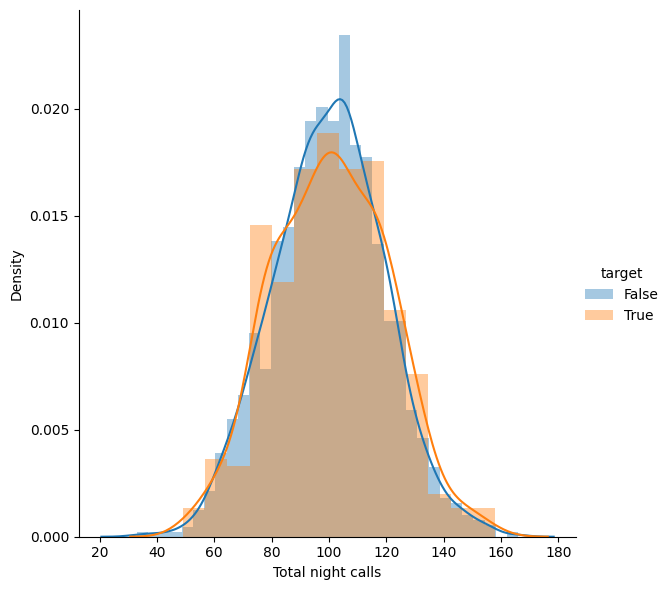

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

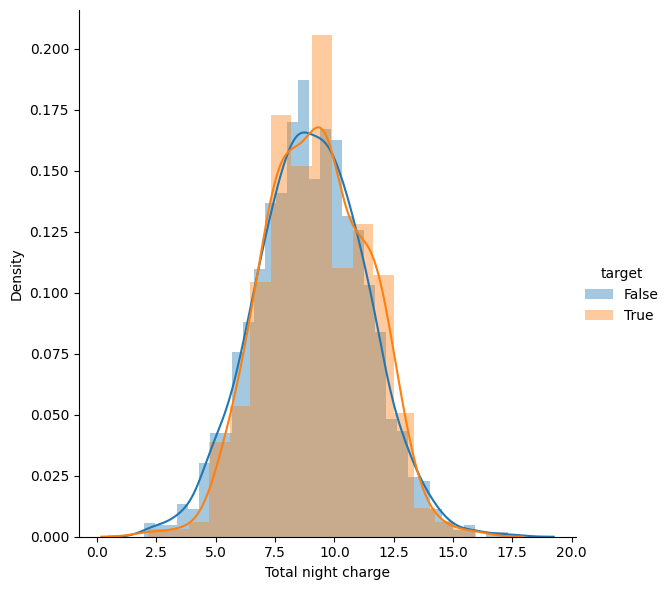

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

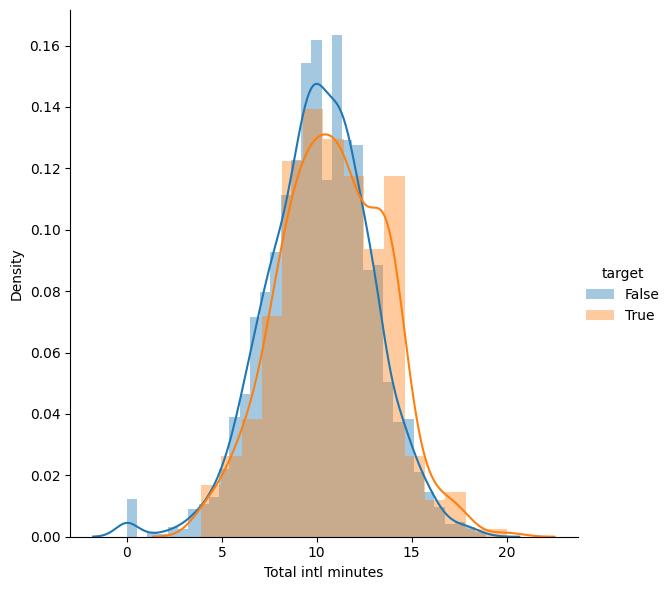

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

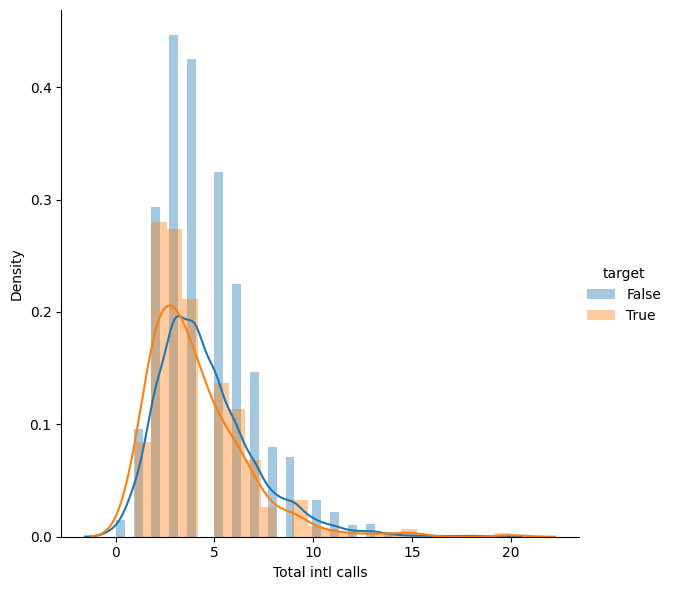

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

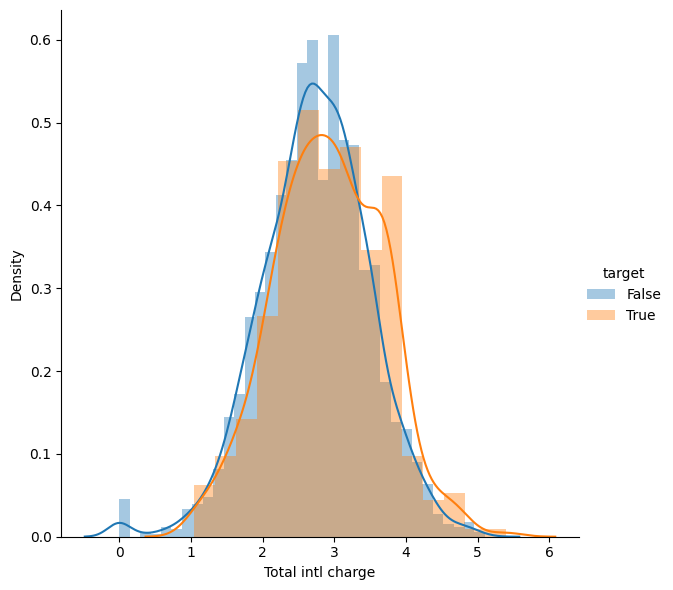

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

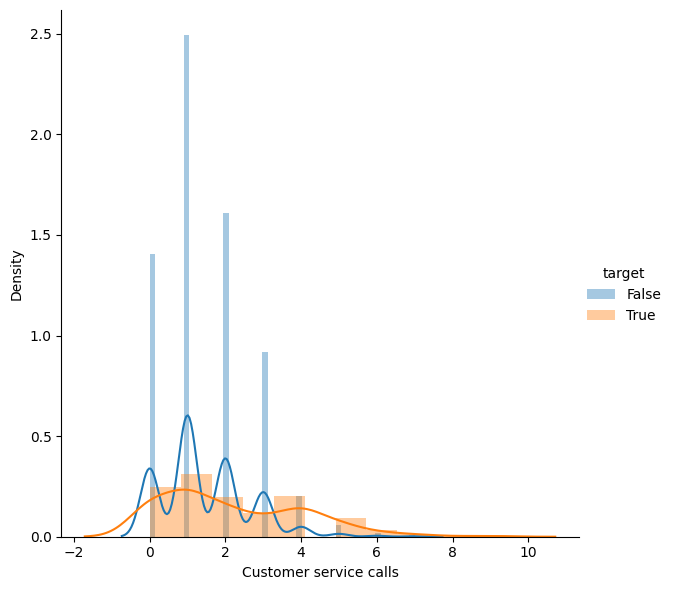

In [63]:
# Display the distribution of numerical variables
plot_data = train_data[num_var].copy() # I dropped the target variable so that I use the plot data to copy the train data
plot_data['target'] = target

plt.figure(figsize=(10, 8))

for col in num_var:
    g = sns.FacetGrid(plot_data, hue='target', height=6)
    g.map(sns.distplot, col)
    g.add_legend()
    plt.show()

As we can see, most of the columns are approximately normal distribution, only 'Customer service calls','Total intl calls', and 'Number vmail messages' features are not the normal distribution.

For the categorical features, the best chart using for these features are barchart. Therefore, I use barchart to see the distribution of the categorical features and compare them.

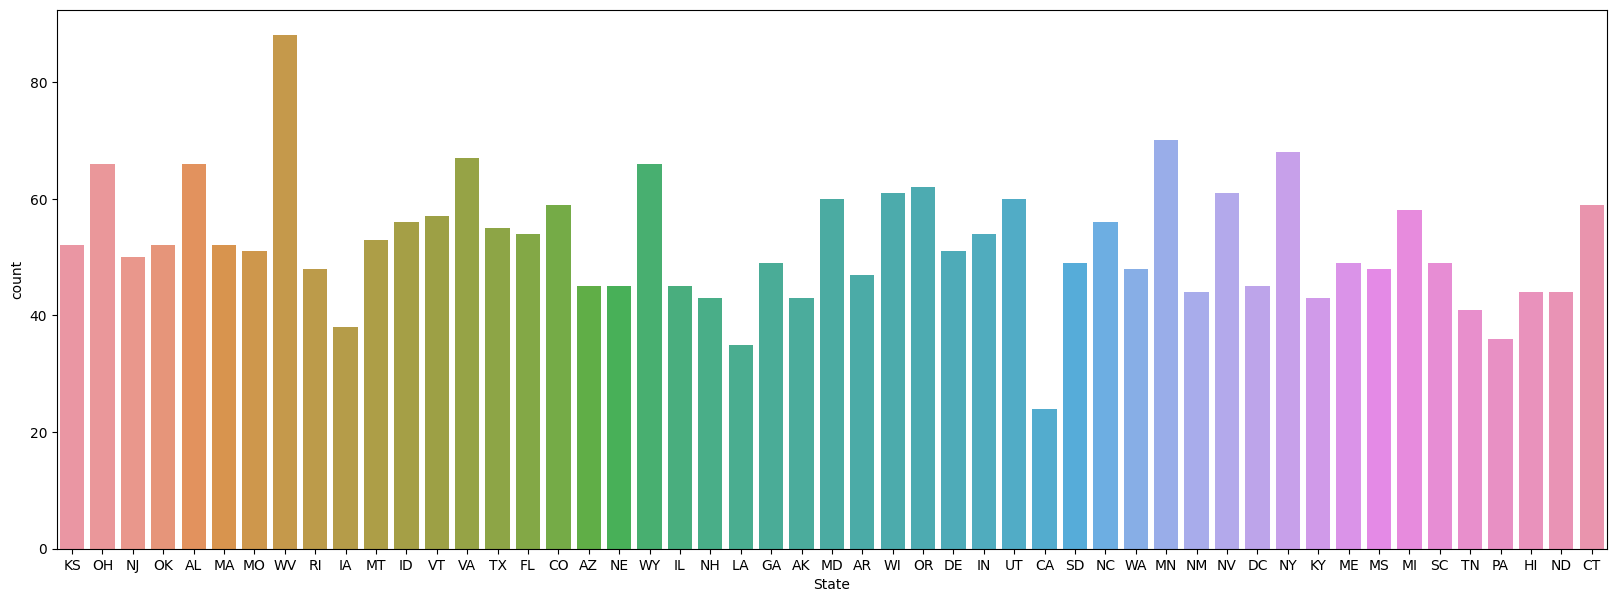

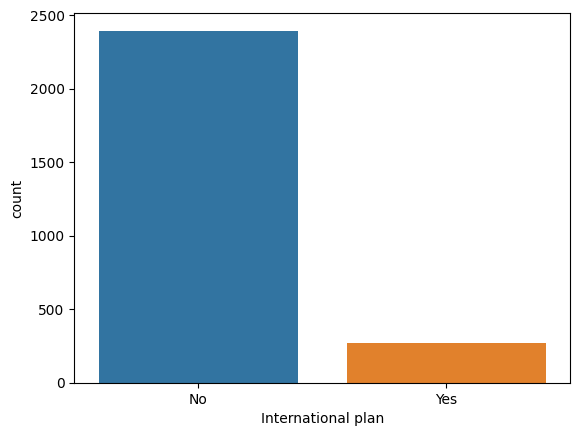

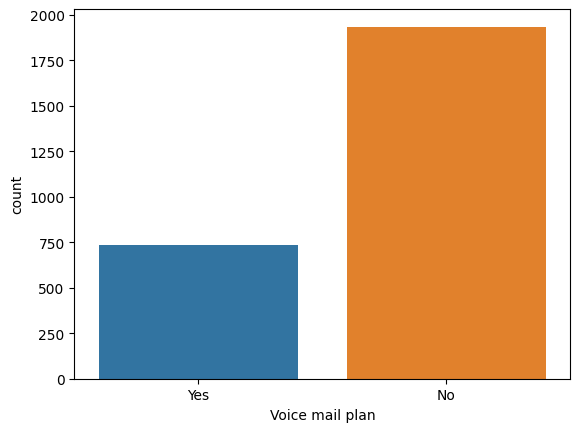

In [ ]:
plt.figure(figsize=(20, 7))
for col in cat_var:
    sns.countplot(x=train_data[col], data=train_data)
    plt.show()

As we can see, in the 'State' feature, the most value counts belongs to 'WV' and the least value counts belongs to 'CA'. 
               in the 'International plan', customers with no plan is higher than the one with the plan.
               in the 'Voice mail plan', customers with no plan is higher than the one with the plan.

Lastly, I will check the target feature 'Churn'. I will use the pie chart for this feature.

([<matplotlib.patches.Wedge at 0x14b8cd35c90>,
 [Text(-0.987013487405142, 0.4855969271734941, 'False'),
  Text(0.9870135101375737, -0.4855968809680577, 'True')],
 [Text(-0.5383709931300774, 0.2648710511855422, '85.4%'),
  Text(0.5383710055295856, -0.2648710259825769, '14.6%')])

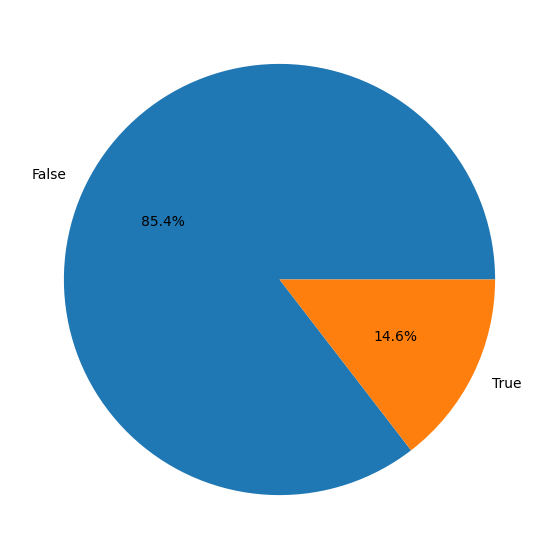

In [ ]:
# First, we need to count the values of the target variable
churn_count = target.value_counts()
# To draw a pie chart, we need to calculate the percentage of each category
percentage =  churn_count / churn_count.sum() * 100

# Draw a pie chart
plt.figure(figsize=(7, 7))
plt.pie(percentage, labels=churn_count.index, autopct='%1.1f%%')

As we can see, only 14.6% customers are churn.

After checking the distribution, I will check the outliers of this dataset by using boxplots and visualize these features.

<Axes: >

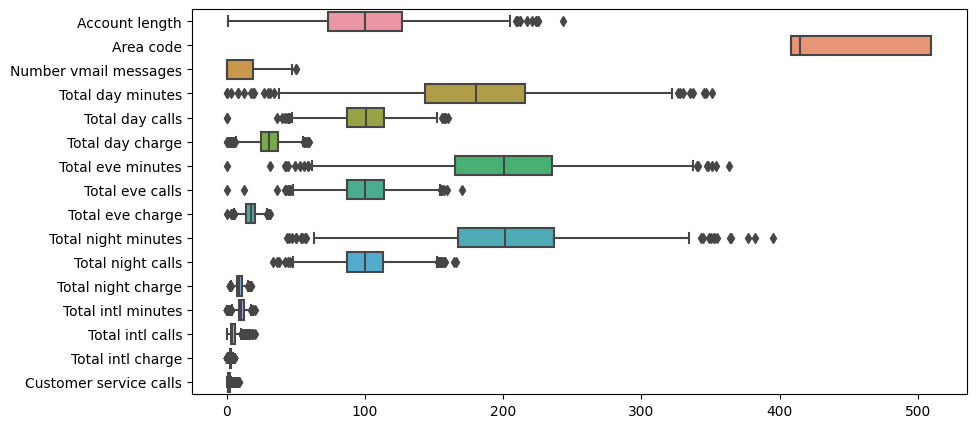

In [ ]:
# Check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, orient='h') 

The boxplots display outliers for some features so that I have to deal with the outliers. There are many ways to deal with outliers but in this case I believe the outliers may contain some useful information and may impact the target feature if I remove them. Therefore, I will replace them with median values.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13516\1839098284.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train_data.quantile(0.25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13516\1839098284.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train_data.quantile(0.75)


<Axes: >

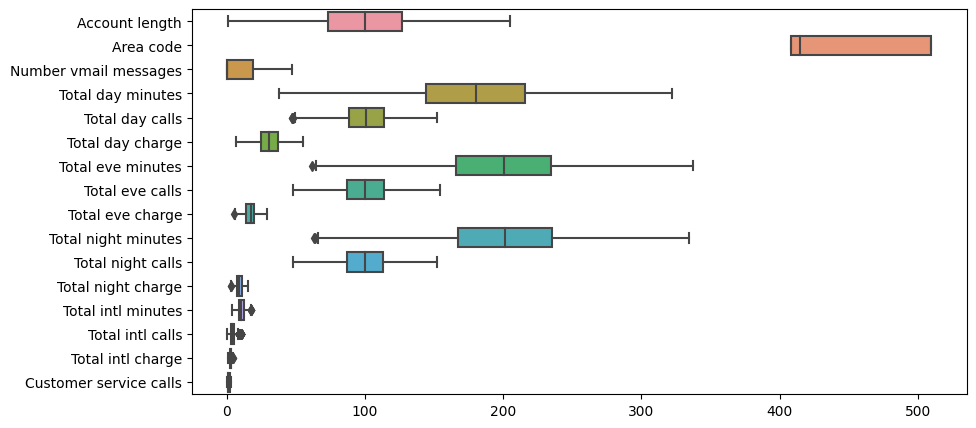

In [ ]:
# Deal with outliers
# Calculate the first and third quartiles
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers with the median
for col in num_var:
    train_data[col] = np.where(train_data[col] < lower_bound[col], train_data[col].median(), train_data[col])
    train_data[col] = np.where(train_data[col] > upper_bound[col], train_data[col].median(), train_data[col])

# Features after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, orient='h')

After the previous step, now I will deal with categorical features. I will perform feature encoding by changing the categorical data to numerical data. Before the encoding step, I will drop some features that I think they do not affect the target variable. The variables are 'Account length', 'Area code' and 'State'.

In [ ]:
# Drop the columns in the train data
train_data = train_data.drop(['State', 'Area code', 'Account length'], axis=1)
train_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0


In [ ]:
# Drop the columns in the test data
test_data = test_data.drop(['State', 'Area code', 'Account length'], axis=1)
test_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


I will replace No with 0 and Yes with 1.

In [ ]:
# Encode the categorical variables in the train data
train_data.replace({'International plan': {'Yes': 1, 'No': 0}, 'Voice mail plan': {'Yes': 1, 'No': 0}}, inplace=True)
train_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0


In [ ]:
# Encode the categorical variables in the test data
test_data.replace({'International plan': {'Yes': 1, 'No': 0}, 'Voice mail plan': {'Yes': 1, 'No': 0}}, inplace=True)
test_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In this step, I will perform data scaling and the method I choose is MinMaxScaler.

In [ ]:
# Scale the train data
scaler = MinMaxScaler()
for col in train_data.columns:
    train_data[col] = scaler.fit_transform(train_data[[col]])
train_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.0,1.0,0.531915,0.798736,0.600000,0.798760,0.492369,0.481132,0.492518,0.668386,0.413462,0.668305,0.471831,0.3,0.478836,0.333333
1,0.0,1.0,0.553191,0.435195,0.723810,0.435124,0.485465,0.518868,0.485678,0.704127,0.528846,0.704341,0.732394,0.3,0.743386,0.333333
2,0.0,0.0,0.000000,0.722515,0.638095,0.722521,0.215480,0.584906,0.215477,0.365881,0.538462,0.366093,0.626761,0.5,0.634921,0.000000
3,1.0,0.0,0.000000,0.919213,0.228571,0.919215,0.000000,0.377358,0.000000,0.492262,0.394231,0.492219,0.232394,0.7,0.235450,0.666667
4,1.0,0.0,0.000000,0.453109,0.628571,0.453099,0.313953,0.698113,0.314237,0.455416,0.701923,0.455364,0.478873,0.3,0.486772,1.000000


In [ ]:
# Scale the test data
scaler = MinMaxScaler()
for col in test_data.columns:
    test_data[col] = scaler.fit_transform(test_data[[col]])                                 
test_data.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.0,0.0,0.0,0.514267,0.496296,0.514400,0.967485,0.328244,0.967742,0.559071,0.360902,0.558994,0.475410,0.222222,0.475709,0.125,0.0
1,0.0,0.0,0.0,0.334630,0.792593,0.334732,0.575072,0.351145,0.575019,0.538752,0.518797,0.539007,0.693989,0.333333,0.694332,0.500,1.0
2,0.0,0.0,0.0,0.995460,0.274074,0.995422,0.859739,0.458015,0.859715,0.398839,0.646617,0.399097,0.295082,0.500000,0.295547,0.500,1.0
3,0.0,0.0,0.0,0.273995,0.540741,0.274080,0.284348,0.496183,0.284321,0.483019,0.473684,0.482914,0.420765,0.333333,0.421053,0.250,0.0
4,0.0,0.0,0.0,0.302853,0.644444,0.302880,0.532356,0.549618,0.532258,0.451379,0.360902,0.451322,0.606557,0.055556,0.607287,0.125,0.0


After the EDA step, I will now apply the machine learning to predict the churn rate of the customers. Three binary classification models that I choose are: Decision Trees, SVM and Logistics Regression.

In [ ]:
# Split the train data into train and validation sets
x_train = train_data
y_train = target

x_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print('Decision Tree accuracy: ', accuracy_score(y_test, dt_pred))

# Confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
print('Decision Tree confusion matrix: \n', dt_cm)
print('Decision Tree classification report: \n', classification_report(y_test, dt_pred))

Decision Tree accuracy:  0.8335832083958021
Decision Tree confusion matrix: 
 [[504  68]
 [ 43  52]]
Decision Tree classification report: 
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       572
         1.0       0.43      0.55      0.48        95

    accuracy                           0.83       667
   macro avg       0.68      0.71      0.69       667
weighted avg       0.85      0.83      0.84       667



In [ ]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print('Support Vector Machine accuracy: ', accuracy_score(y_test, svm_pred))

# Confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
print('Support Vector Machine confusion matrix: \n', svm_cm)
print('Support Vector Machine classification report: \n', classification_report(y_test, svm_pred))

Support Vector Machine accuracy:  0.8755622188905547
Support Vector Machine confusion matrix: 
 [[553  19]
 [ 64  31]]
Support Vector Machine classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       572
         1.0       0.62      0.33      0.43        95

    accuracy                           0.88       667
   macro avg       0.76      0.65      0.68       667
weighted avg       0.86      0.88      0.86       667



In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print('Logistic Regression accuracy: ', accuracy_score(y_test, lr_pred))

# Confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred)
print('Logistic Regression confusion matrix: \n', lr_cm)
print('Logistic Regression classification report: \n', classification_report(y_test, lr_pred))

Logistic Regression accuracy:  0.8440779610194903
Logistic Regression confusion matrix: 
 [[554  18]
 [ 86   9]]
Logistic Regression classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.91       572
         1.0       0.33      0.09      0.15        95

    accuracy                           0.84       667
   macro avg       0.60      0.53      0.53       667
weighted avg       0.79      0.84      0.80       667



In [ ]:
model_comparison = pd.DataFrame()

models = [lr_model, dt_model, svm_model]

model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine']

for model, name in zip(models, model_names):
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, model.predict(x_test))
    precision = precision_score(y_test, model.predict(x_test))
    recall = recall_score(y_test, model.predict(x_test))
    f1 = f1_score(y_test, model.predict(x_test))

    model_comparison = model_comparison.append(pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    }))

model_comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_13516\3802836908.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({
C:\Users\Admin\AppData\Local\Temp\ipykernel_13516\3802836908.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({
C:\Users\Admin\AppData\Local\Temp\ipykernel_13516\3802836908.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.844078,0.333333,0.094737,0.147541
0,Decision Tree,0.833583,0.433333,0.547368,0.483721
0,Support Vector Machine,0.875562,0.620000,0.326316,0.427586
